In [7]:
'''
All in all you have to change 2 things:
1) define the kernel in kernel_formula function
2) change the value of gamma in the last block when calling predictor function
'''

'\nAll in all you have to change 2 things:\n1) define the kernel in kernel_formula function\n2) change the value of gamma in the last block when calling predictor function\n'

In [8]:
#module import
import numpy as np
import pandas as pd
import math  
import matplotlib.pyplot as plt

In [9]:
#data processing
dataframe = pd.read_csv('train.csv',header=None)
data = dataframe.iloc[:,[0,2]].values
x = data[:,0]
y = data[:,1]

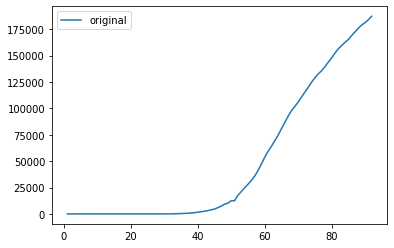

In [10]:
#original data plot
plt.plot(x,y,label='original')
plt.legend()
plt.show()

In [24]:
#define kernel formula here. Only this function should be changed for different kernels and parameters
def kernel_formula(x_i,x_j,w_1,w_2,w_3):
    
    #for the gaussian kernel uncomment it
    '''
    sigma = 2
    gaussian = np.exp(-np.square(np.linalg.norm(x_i-x_j))/(2*sigma*sigma))
    return gaussian
    '''
    
#     #for kernel in sir's paper
#     w_1 = 0.859
#     w_2 = 5
#     w_3 = 0.4
    return np.power(x_i*x_j,w_1)+w_2*np.exp(-w_3*np.square(x_i-x_j))

#do not touch this function
def kernel_matrix_generator(x,w_1,w_2,w_3):
    kernel_matrix = np.zeros(shape=(x.shape[0],x.shape[0]))
    i=0
    for x_i in x:
        j=0
        for x_j in x:
            kernel_matrix[i,j] = kernel_formula(x_i,x_j,w_1,w_2,w_3)
            j+=1
        x+=1
    return kernel_matrix

#do not touch this function
def predictor(x,y,gamma,w_1,w_2,w_3):
    kernel_matrix = kernel_matrix_generator(x,w_1,w_2,w_3)
    A = gamma*(kernel_matrix.shape[0])*np.identity(kernel_matrix.shape[0])
    A = np.add(A,kernel_matrix)
    B=y
    c = np.linalg.solve(A,B)
    #print(c)
    output = np.zeros(shape=(B.shape[0]))
    for j in range(B.shape[0]):
        for i in range(B.shape[0]):
            output[j]+=c[i]*kernel_formula(x[i],x[j],w_1,w_2,w_3)
    return output

def MSE(yT,yP):
    N=len(yT)
    if len(yT)!=len(yP):
        print (len(yT))
        return 1
    s=0
    for i in range(0,N):
       s+=(yT[i]-yP[i])**2
    return math.sqrt(s)

In [39]:
print(np.arange(1,4))

[1 2 3]


w1=  0.0001 w2=  0.0001 w3=  1.5000 gam=  1.0000 mse:  614486.8604
w1=  0.0001 w2=  0.3001 w3=  1.5000 gam=  1.0000 mse:  611585.3037
w1=  0.0001 w2=  0.6001 w3=  1.5000 gam=  1.0000 mse:  608690.7386
w1=  0.0001 w2=  0.9001 w3=  1.5000 gam=  1.0000 mse:  605803.2695
w1=  0.0001 w2=  1.2001 w3=  1.5000 gam=  1.0000 mse:  602923.0031
w1=  0.0001 w2=  1.5001 w3=  1.5000 gam=  1.0000 mse:  600050.0477
w1=  0.0001 w2=  1.8001 w3=  1.5000 gam=  1.0000 mse:  597184.5137
w1=  0.0001 w2=  2.1001 w3=  1.5000 gam=  1.0000 mse:  594326.5135
w1=  0.0001 w2=  2.4001 w3=  1.5000 gam=  1.0000 mse:  591476.1613
w1=  0.0001 w2=  2.7001 w3=  1.5000 gam=  1.0000 mse:  588633.5737


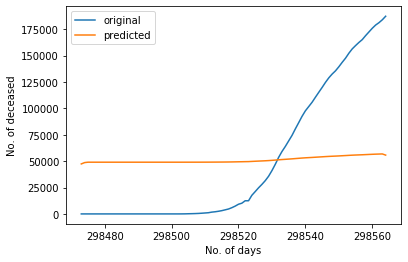

27.089409828186035


In [51]:
#plot for both predicted and original curve
#for kernel in sir's paper
#             w_1 = 0.859
#             w_2 = 5
#             w_3 = 0.4
import time;
ts = time.time()
#w1=  0.0001 w2=  2.7001 w3=  1.5000 gam=  1.0000 mse:  588633.5737
least= float('inf')
for i in np.arange(0.0001,3,0.3):  #range of w_1
    for j in np.arange (0.0001,3,0.3):   #range of w_2
        for k in np.arange(0.0001,3,0.3):  #range of w_3
            for l in np.arange(0.0001,3,0.3):  #range of gamma
               currpreds=predictor(x,y,l,i,j,k)
               curr=MSE(currpreds,y)
               if curr<least:
                    preds=currpreds
                    least=curr
                    w_1=i
                    w_2=j
                    w_3=k
                    gam=l
                    print("w1= % 5.4f w2= % 5.4f w3= % 5.4f gam= % 5.4f mse: % 5.4f" %(w_1,w_2,w_3,gam,least))                    
#preds = predictor(x,y,0.1,0.1,1,0.1) #change the gamma value here - regularization parameter
#print (MSE(preds,y))
plt.plot(x,y,label='original')
plt.plot(x,preds,label='predicted')
plt.legend()
plt.xlabel('No. of days')
plt.ylabel('No. of deceased')
plt.show()
te = time.time()
print(te-ts)